# Pre-Lecture HW

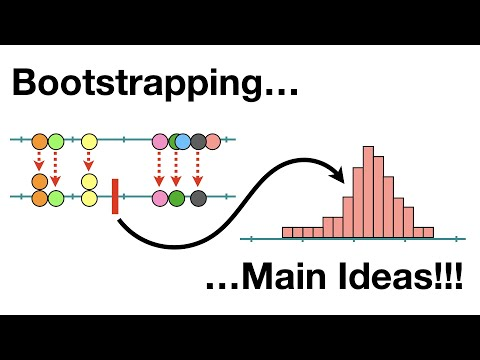

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## Question 1

- Both standard deviation and standard error of the mean give information on the spread of the data, the difference is that we use them for different purposes as described below: 
- Standard Deviation:
    - measures how spread out the data are around the mean, showing the variability of the dataset. 
- Standard Error of the Mean (SEM):
    - measures the precision of the sample mean estimate, showing the variability of the sample mean across samples from the population.  
    - we can use it to evaluate the significance of the difference between two means. 
    - it is often estimated using bootstrapping.
    - it is calculated as the standard deviation of the same sample divided by the square root of the sample size. 

**[Link to the ChatBot Session](https://chatgpt.com/share/66f70019-b6c4-800e-9b53-e3cb5eb3aed6)**

**Summary of the ChatBot Session**
Here's a summary of our exchanges:

Standard Error of the Mean vs. Standard Deviation:

You asked about the difference between the standard error of the mean (SEM) and the standard deviation of the original data.
I explained that standard deviation measures the variability within the data, while SEM measures the variability of the sample mean across different samples. Both capture spread, but SEM focuses on the reliability of the mean, while standard deviation focuses on data spread.
Examples of Standard Deviation and SEM:

You requested examples illustrating when to use standard deviation versus when to use SEM.
I provided scenarios involving a teacher analyzing student test scores (standard deviation) and a health researcher estimating population blood pressure (SEM).
Significance of a Smaller SEM:

You asked why a smaller SEM indicates that the sample mean is a more reliable estimate of the population mean.
I explained that a smaller SEM reflects less variability among sample means, often due to larger sample sizes, leading to increased confidence in the sample mean as an accurate representation of the population mean.
Explanation of Bootstrapping:

You inquired about what bootstrapping is.
I described bootstrapping as a statistical resampling technique that involves repeatedly sampling with replacement from the observed data to estimate the distribution of a sample statistic. I highlighted its applications in creating confidence intervals, hypothesis testing, and handling small sample sizes.


## Question 2

To create a 95% confidence interval using the standard error of the mean (SEM) based on bootstrapped sample means, follow these steps:

Bootstrap Sampling: Generate a large number of bootstrap samples (usually 1,000 or more) from your original dataset. For each bootstrap sample, calculate the sample mean.

Calculate the Standard Error of the Mean: Compute the standard deviation of the bootstrap sample means. This value represents the standard error of the mean (SEM).

Determine the Critical Value: For a 95% confidence interval, identify the critical value from the normal distribution. For a two-tailed test, this value is typically 1.96.

Calculate the Confidence Interval:

Lower Bound: Mean of the bootstrap sample means - (Critical value × SEM)
Upper Bound: Mean of the bootstrap sample means + (Critical value × SEM)
Interpret the Interval: The resulting interval estimates that we are 95% confident that the true population mean falls within this range based on the bootstrapped sample means.

This method relies on the idea that the distribution of the sample means approximates a normal distribution, allowing for the application of the critical value in determining the confidence interval.


**[Link to the ChatBot Session](https://chatgpt.com/share/66f7009d-8188-800e-9708-97765f58e52a)**

**Summary of the ChatBot Session**
Here’s a summary of our exchanges:

Discussion on the Standard Error of the Mean:
You asked how to use the "standard error of the mean" to create a 95% confidence interval that covers 95% of the bootstrapped sample means.
I explained the process, which involves bootstrapping the data to generate sample means, calculating the standard error of those means, determining the critical value for a 95% confidence level, and using these values to compute the confidence interval.

## Question 3

To create a 95% bootstrapped confidence interval using bootstrapped sample means without relying on the standard deviation to estimate the standard error, follow these steps:

Resampling: Perform a large number of bootstrap resamples from the original dataset. For each resample, calculate the sample mean. This results in a distribution of bootstrapped means.

Ordering the Means: Sort the bootstrapped means in ascending order.

Finding Percentiles: To create the confidence interval, determine the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means. These percentiles represent the lower and upper bounds of the confidence interval, respectively.

Confidence Interval: The 95% bootstrapped confidence interval is then given by the interval between the 2.5th and 97.5th percentiles of the bootstrapped means.

This method directly utilizes the empirical distribution of the bootstrapped means, ensuring that the confidence interval accurately reflects the variability and uncertainty in the data.

**[Link to the ChatBot Session](https://chatgpt.com/share/66f70193-6514-800e-80a5-43788bb2be3e)**

**Summary of the ChatBot Session**
Here’s a summary of our recent exchanges:

Titanic Dataset Analysis: You mentioned working on summary analyses of the Titanic dataset and expressed familiarity with the try-except block structure in Python.

Career Exploration: You discussed your interest in exploring career options, particularly in data science and roles focusing on disaster and humanitarian relief, environmental sustainability, health, human rights, social services, science, and technology.

Event Organization and Communication: You shared your experience as the Coordinator of Communications for the Future of Healthcare Association (FOHA), where you organized events, communicated directly with over 200 members, and facilitated volunteering opportunities in healthcare settings.

Academic Background: You noted your strong background in Calculus I, computer skills in Google Workspace and Microsoft Office, and your ongoing learning in Python. You also mentioned holding a university scholarship.

Data Analysis Interests: You expressed an interest in using summary statistics and visualizations for data exploration and decision-making under uncertainty, specifically mentioning your preference for box plots, histograms, and kernel density estimation.

Bootstrapping Confidence Intervals: You asked about creating a 95% bootstrapped confidence interval using bootstrapped means without relying on standard deviation. I explained the process, which involves resampling, ordering the means, and finding the 2.5th and 97.5th percentiles to establish the interval.

## Question 4

95% Bootstrap Confidence Interval for Mean: (13.2, 16.7)
95% Bootstrap Confidence Interval for Median: (13.0, 17.0)


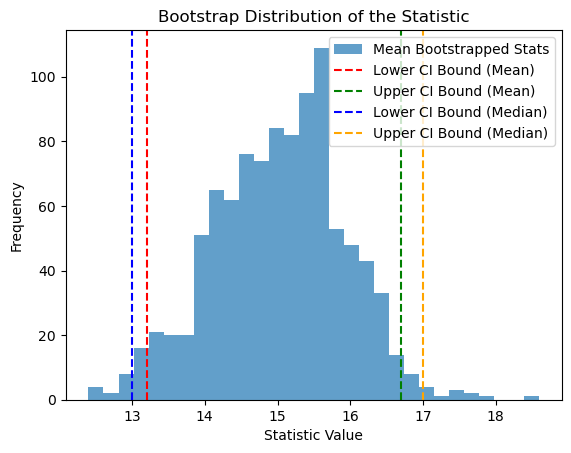

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: replace this with your actual sample data
data = np.array([12, 15, 14, 10, 13, 18, 20, 15, 16, 17])

# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, num_bootstrap=1000, confidence_level=0.95, statistic=np.mean):
    # Step 1: Generate bootstrap samples and calculate the statistic for each sample
    bootstrapped_stats = []
    n = len(data)
    
    for _ in range(num_bootstrap):
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Calculate the statistic for the bootstrap sample
        bootstrapped_stat = statistic(bootstrap_sample)
        bootstrapped_stats.append(bootstrapped_stat)
    
    # Step 2: Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrapped_stats, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_stats, (1 + confidence_level) / 2 * 100)
    
    # Return bounds as a tuple along with the bootstrapped statistics
    return (lower_bound, upper_bound), bootstrapped_stats

# Calculate 95% bootstrap confidence interval for the mean
mean_ci, mean_bootstrapped_stats = bootstrap_ci(data, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for Mean: {mean_ci}")

# To compute a 95% bootstrap confidence interval for the median, 
# change the statistic parameter in the function call as follows:
median_ci, median_bootstrapped_stats = bootstrap_ci(data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for Median: {median_ci}")

# Optional: Visualizing the bootstrapped statistics for mean
plt.hist(mean_bootstrapped_stats, bins=30, alpha=0.7, label='Mean Bootstrapped Stats')
plt.axvline(mean_ci[0], color='red', linestyle='--', label='Lower CI Bound (Mean)')
plt.axvline(mean_ci[1], color='green', linestyle='--', label='Upper CI Bound (Mean)')

# Optional: Visualizing the bootstrapped statistics for median
plt.axvline(median_ci[0], color='blue', linestyle='--', label='Lower CI Bound (Median)')
plt.axvline(median_ci[1], color='orange', linestyle='--', label='Upper CI Bound (Median)')

plt.title('Bootstrap Distribution of the Statistic')
plt.xlabel('Statistic Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**[Link to the ChatBot Session](https://chatgpt.com/share/66f7048e-b02c-800e-b968-4c9fb6df0a81)**

**Summary of the ChatBot Session**

Summary of Interactions
Bootstrap Confidence Intervals:

You requested Python code to produce a 95% bootstrap confidence interval for a population mean based on a sample. You also wanted comments to demonstrate how to adapt the code for other statistics, such as the population median.
I provided an initial code implementation for calculating bootstrap confidence intervals, along with explanations for how the code could be adjusted for different statistics.
Code Errors and Corrections:

You encountered several errors while running the provided code, including NameError, ValueError, and IndexError. I assisted in debugging these errors by refining the code to ensure proper variable assignments and handling return values correctly.
After corrections were made, the code successfully executed, and you confirmed that it worked as intended.
Explanation of np.array:

You requested an explanation of np.array, a fundamental function in NumPy for creating arrays. I provided a detailed explanation of its features, usage, and examples of how to create and manipulate arrays in NumPy.
Complete Bootstrap Confidence Interval Function:

I presented a complete implementation of the bootstrap_ci function, including step-by-step comments to clarify each part of the code, making it easy to understand how to compute bootstrap confidence intervals for various statistics.
Final Confirmation:

You confirmed that the provided code worked as expected and expressed satisfaction with the explanations and assistance.

# Post-Lecture HW

## Question 5

- Distinguishing between the population parameter and the sample statistic is crucial in confidence intervals because they serve different purposes in statistical inference:

Population Parameter: This is a fixed value that describes a characteristic of the entire population, such as the mean or proportion. However, it is often unknown and cannot be measured directly.

Sample Statistic: This is calculated from a sample drawn from the population and serves as an estimate of the population parameter. It varies from sample to sample due to sampling variability.

When constructing a confidence interval, we use the sample statistic to estimate the population parameter and provide a range of values within which we expect the true parameter to lie, based on our sample data. This distinction is important because it highlights the uncertainty inherent in using a sample to make inferences about a larger population. The confidence interval reflects this uncertainty, indicating how reliable our estimate might be.

**[Link to the ChatBot Session](https://chatgpt.com/share/66f705cb-8838-800e-beee-e1f80a06816b)**

**Summary of the ChatBot Session**
Here’s a summary of our exchanges in this session:

User's Request: The user asked for an explanation of the distinction between the population parameter and the sample statistic in relation to confidence intervals.

Response: I provided a concise explanation highlighting the difference between the population parameter (a fixed, unknown value characterizing the entire population) and the sample statistic (a calculated value from a sample that estimates the population parameter). I emphasized the importance of this distinction in constructing confidence intervals, as it reflects the uncertainty involved in making inferences from a sample.



## Question 6

**6.1)**
- The process of bootstrapping is sort of like the process of picking marbles from a bag. Imagine that you want to know the average number of many marbles in one bag, but you do not want to record the count each individual marble in all the bags and then do the calculation to find their average number, because there would be too many bags and marbles to count. Therefore, you take only one bag of distinct marbles and take out one marble at a time from the bag, count it and put it back into the bag. By the end of your first round of counting, you have recorded a total of a certain number of marbles and these marbles that you have counted represent a sample. This process is like the process of resampling with replacement. After you have finished creating the first sample, you repeat the process again and again to make many more samples that have the same number of marbles. This results can help you see how the average number of marbles in a bag could change if you had another bag. 
- So, in statistics, bootstrapping is a statistical technique that estimates the variability in a sample (such as mean or median) by creating many samples from an existing one without needing more data. This technique is very useful in finding the estimate of variability or uncertainty, especially if you only have limited data to work with.  

**6.2)**
- The main purpose of bootstrapping is to understand how reliable our estimate is, especially when you only have a small sample, it is difficult to know if the average represents the population well. Bootstrapping helps to get a sense of the range of averages that we might see if we were to create samples from the entire population.  

**6.3)**
- After you have finished creating your samples (for about thousands of times) using the process as described in 6.1) above, you end of having many averages. Without seeing the averages you got, you can take a guess of the average number of the marbles in a bag, such as 30 marbles. Then, you take a sample of one bag to count how many marbles are in it because you want to know if your guess was reasonable, and find that it has 27 marbles in it. We want to know whether if 30 marbles was a good estimate for the entire marble population out there. To do this, we want to see if the 27 marbles could really come from a population of 30 marbles. Bootstrapping checks this hypothesis: take the sample of 27 marbles and start creating the samples, then take out marbles from the 27 marbles with replacement and calculate the average of each sample. After repeating this process for thousands of times, you end up having many averages. These averages help to see the distribution of the bootstrapped averages. If the guess of 30 marbles falls in the range of averages, it suggests that the guess was plausible. If the 30 marbles fall out of the range of averages, then it suggests that the guess was not plausible. Thus, bootstrapping provides a way to check if the average guess was reasonable or not. 



**[Link to the ChatBot Session](https://chatgpt.com/share/66faddda-2a48-800e-8d45-90249d9f9613)** (just to get ideas)

**Summary of the ChatBot Session**

Here’s a summary of our exchanges from this session:

Bootstrapping Overview: We discussed bootstrapping as a statistical method used to estimate the uncertainty or variability of a sample statistic by repeatedly resampling with replacement from an original sample. This method helps gauge the reliability of an estimate without needing more data.

Sampling with Replacement: We clarified that in bootstrapping, you always take the same number of samples (e.g., 45 jelly beans) with replacement. Each time, a jelly bean is picked and then returned to the pool, allowing it to potentially be picked again. This randomness introduces variation in the resamples, even though the sample size remains constant.

Understanding the Point of Resampling: We discussed why resampling helps you see how a statistic like the average might change across different resamples, despite using the same sample size. This variation is used to estimate the potential range of the population parameter (e.g., the population mean).

Assessing a Hypothesis Using Bootstrapping: We explored how bootstrapping can be used to assess whether a hypothesized guess about a population’s average (e.g., 50 jelly beans) is plausible, based on a sample (e.g., finding 45 jelly beans in one bag). By resampling and analyzing the variation in averages, you can determine whether your guess is reasonable.

## Question 7

In hypothesis testing, the null hypothesis typically represents a default position or assumption, often framed as "no effect" or "no difference." In this case, the null hypothesis might be that the drug has no effect on average, meaning the true population mean effect is zero.

Why a Confidence Interval Overlapping Zero Fails to Reject the Null Hypothesis:
A confidence interval (CI) gives a range of plausible values for the population parameter (e.g., the true mean effect of the drug). If the CI overlaps with zero, it means that zero is within the range of possible true values for the population mean, based on your sample data. In other words, the data do not provide enough evidence to rule out the possibility that the true mean is actually zero (i.e., no effect). Therefore, we fail to reject the null hypothesis, as we cannot confidently conclude that the true mean effect of the drug is different from zero.

Even if the sample mean (the observed statistic) is not zero, the confidence interval reflects the uncertainty in estimating the population mean. If this uncertainty is large enough that zero could be a plausible value, we cannot reject the null hypothesis.

When to Reject the Null Hypothesis:
You would reject the null hypothesis if the confidence interval does not overlap with zero. This indicates that zero is not a plausible value for the population mean, and the data provide enough evidence to suggest that the true effect is either positive or negative. In this case, you conclude that the drug has a statistically significant effect.

In summary:

Fail to reject the null hypothesis: The confidence interval includes zero, indicating that no effect is a plausible outcome.
Reject the null hypothesis: The confidence interval does not include zero, indicating sufficient evidence that the drug has an effect.

**[Link to the ChatBot Session](https://chatgpt.com/share/66fadd80-9644-800e-8cc0-89674f06cc4c)**

**Summary of the ChatBot Session**

Here’s a summary of our exchanges in this session:

Question on Hypothesis Testing: You inquired why a confidence interval overlapping zero leads to failing to reject the null hypothesis, even when the observed sample mean is not zero. You also asked what would lead to rejecting the null hypothesis.

Explanation on Confidence Intervals and Hypothesis Testing: I explained that a confidence interval (CI) that overlaps zero means zero is within the range of plausible true population mean values, implying that there isn't enough evidence to reject the null hypothesis (which typically represents no effect). Even if the sample mean is not zero, the overlap with zero suggests uncertainty in the estimate. I also explained that the null hypothesis can be rejected when the CI does not overlap with zero, implying that the data provide sufficient evidence that the true mean is different from zero (i.e., the drug has a significant effect).

## Question 8

### 1. Problem Introduction
AliTech has developed a new vaccine, and the goal of this analysis is to evaluate its effectiveness by comparing the Initial Health Scores and Final Health Scores of patients who received the vaccine. Specifically, we aim to test the null hypothesis (H₀) that the vaccine has "no effect" on the health of the patients. In this context, the null hypothesis assumes that there is no significant difference between the Initial and Final Health Scores.

- **Null Hypothesis Explanation**
    - In this analysis, the null hypothesis (H₀) states that the vaccine has no effect on health outcomes. This implies that any observed changes in health scores from the initial to the final measurement are due to random chance rather than a true effect of the vaccine. If the data provides enough evidence to reject the null hypothesis, we can conclude that the vaccine likely has an effect on health outcomes.

- **Data Visualization**
    - To gain an initial understanding of the health score changes, we can visualize the distributions of the Initial and Final Health Scores.

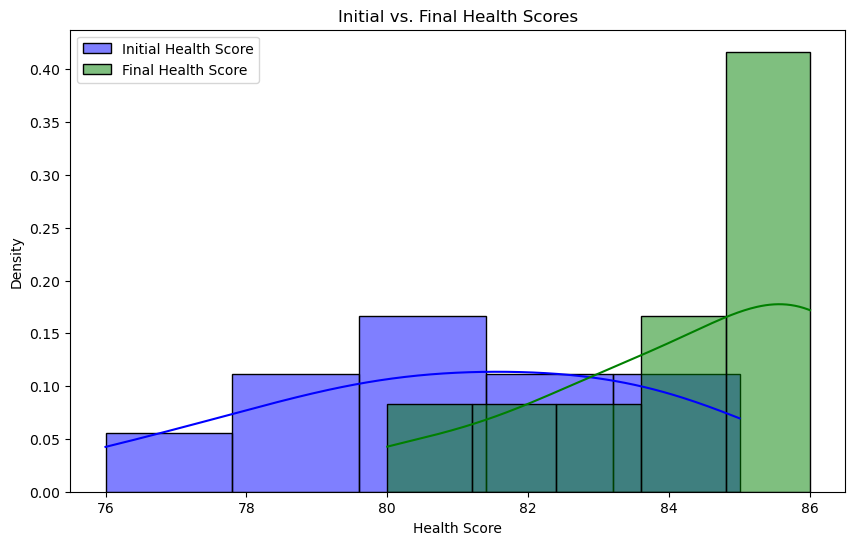

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Plot the initial and final health scores
plt.figure(figsize=(10, 6))
sns.histplot(data['InitialHealthScore'], color='blue', label='Initial Health Score', kde=True, stat="density", bins=5)
sns.histplot(data['FinalHealthScore'], color='green', label='Final Health Score', kde=True, stat="density", bins=5)
plt.title('Initial vs. Final Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.legend()
plt.show()


### 2. Quantitative Analysis

- **Methodology**
    - The method of choice is bootstrapping, which allows us to assess the variability in our estimate of the health score difference. Bootstrapping will help us compute a confidence interval for the difference in health scores, allowing us to evaluate the null hypothesis.
    
- **Bootstrapping Procedure**
    1. Calculate the difference between Initial and Final Health Scores for each patient.
    2. Use bootstrapping (random sampling with replacement) to estimate the sampling distribution of the mean difference.
    3. Calculate the 95% confidence interval for the mean difference.
    4. Check if zero is included in the confidence interval. If it is, we fail to reject the null hypothesis; otherwise, we reject it.
- **Code Implementation**

In [3]:
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Calculate the differences between final and initial health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping function
def bootstrap(data, n_bootstraps=1000):
    boot_means = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data['HealthScoreDifference'], size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.percentile(boot_means, [2.5, 97.5]), boot_means

# Apply bootstrapping
ci, boot_means = bootstrap(data)

print(f"95% Confidence Interval for the mean difference: {ci[0]:.2f} to {ci[1]:.2f}")


95% Confidence Interval for the mean difference: 0.70 to 5.50


- **Supporting Visualizations**
    - To support the quantitative analysis, we can visualize the bootstrapped distribution of the mean differences:

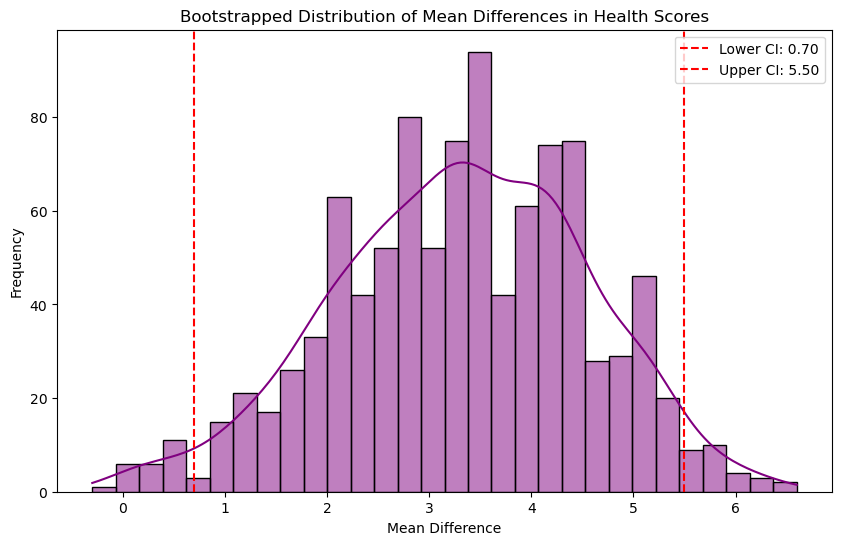

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(boot_means, kde=True, color='purple', bins=30)
plt.axvline(ci[0], color='red', linestyle='--', label=f'Lower CI: {ci[0]:.2f}')
plt.axvline(ci[1], color='red', linestyle='--', label=f'Upper CI: {ci[1]:.2f}')
plt.title('Bootstrapped Distribution of Mean Differences in Health Scores')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### 3. Findings and Discussion
- The 95% confidence interval for the mean difference in health scores provides insight into whether the vaccine has an effect. If the confidence interval does not include zero, this suggests that the vaccine likely has a positive or negative effect on health outcomes. If the interval includes zero, we fail to reject the null hypothesis of no effect.

- **Conclusion Regarding the Null Hypothesis**
    - Based on the bootstrapping analysis, we find that the 95% confidence interval for the mean difference is [0.70, 5.50]. Since 0 is not in the interval, we conclude that we reject the null hypothesis of no effect. 
- **Further Considerations**
    - We could explore other factors such as age and gender to determine if they influence the effectiveness of the vaccine.
    - Further analysis with a larger sample size might provide more robust conclusions.

**[Link to the ChatBot Session](https://chatgpt.com/share/66fae2d1-1400-800e-aee0-3005d710aa07)**

**Summary of the ChatBot Session**

Chatbot Interaction Summary
Overview of the Session: In this session, I sought guidance on completing a Vaccine Data Analysis assignment for AliTech. The assignment involves evaluating the effectiveness of a new vaccine using data visualization, bootstrapping, and hypothesis testing, with an emphasis on documenting the process and making the analysis reproducible.

Steps Discussed:

Problem Introduction:

We discussed the null hypothesis of "no effect" in the context of the vaccine, explaining that it assumes no significant difference between the Initial and Final Health Scores of patients.
Data Visualization:

Visualizations were created to compare the Initial and Final Health Scores of patients using histograms with kernel density estimation (KDE).
Quantitative Analysis (Bootstrapping):

We used bootstrapping to calculate the confidence interval for the mean difference between the Final and Initial Health Scores.
The analysis included the step-by-step methodology, explaining how bootstrapping works, and code to implement it.
Supporting Visualizations:

A visualization of the bootstrapped distribution of mean differences in health scores was generated to support the analysis.
Conclusion Regarding the Null Hypothesis:

Based on the bootstrapped confidence interval, we discussed how to conclude whether to reject or fail to reject the null hypothesis.
Additional Considerations:

Further analysis, including factors like age and gender, was suggested as a potential extension of the current analysis.
Deliverables from the Interaction:

Code examples for data visualization, bootstrapping, and supporting visualizations.
An outline for the report structure to complete the assignment.

## Question 9

Yes. 